In [1]:
import numpy as np
import skimage.data as skd
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt

In [4]:
def compute_error(original, compressed, rows, cols):
    compressed = np.clip(compressed.astype('uint8'), 0, 255)
    #Reshape the image to original dimension
    compressed = compressed.reshape(rows, cols, 3)

    # Compute PSNR
    psnr_val = psnr(original, compressed)
    print("PSNR:", psnr_val)

    # Compute SSIM
    ssim_val = ssim(original, compressed, channel_axis=2)
    print("SSIM:", ssim_val)

    fig, axs = plt.subplots(1, 2)

    axs[0].axis('off')
    axs[0].set_title('Original image')
    axs[0].imshow(original)

    axs[1].axis('off')
    axs[1].set_title('Quantized image')
    axs[1].imshow(compressed)
    
    plt.show()

### CAT ###

### Float ###
PSNR: 30.912756740957946
SSIM: 0.8671900279021916


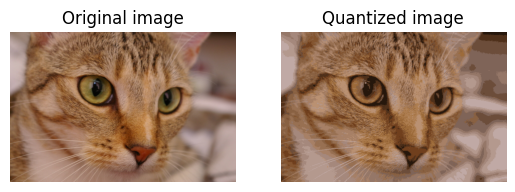


### Posit ###
PSNR: 30.912756740957946
SSIM: 0.8671900279021916


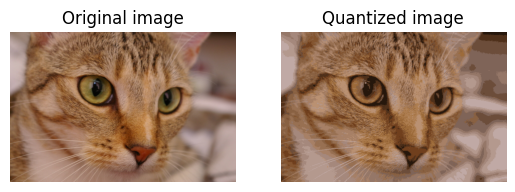


### Log Approx Posit ###
PSNR: 22.029105345638182
SSIM: 0.6249998740896481


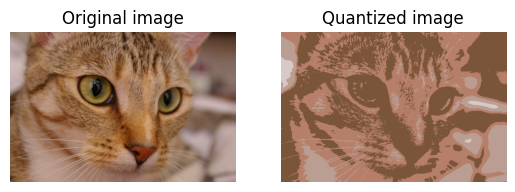

In [5]:
print('### CAT ###')
rows, cols = 300, 451

img = skd.chelsea()

# Exact division - float
print('\n### Float ###')
my_clusters = np.genfromtxt('cat_float/16-clusters.txt')
my_labels = np.genfromtxt('cat_float/16-points.txt', dtype=int)-1
compressed_img = my_clusters[my_labels]*255.0

compute_error(img, compressed_img, rows, cols)

# Exact division - posit
print('\n### Posit ###')
my_clusters = np.genfromtxt('cat_posit/16-clusters.txt')
my_labels = np.genfromtxt('cat_posit/16-points.txt', dtype=int)-1
compressed_img = my_clusters[my_labels]*255.0

compute_error(img, compressed_img, rows, cols)

# Approximate division
print('\n### Log Approx Posit ###')
my_clusters = np.genfromtxt('cat_posit_approx/16-clusters.txt')
my_labels = np.genfromtxt('cat_posit_approx/16-points.txt', dtype=int)-1
compressed_img = my_clusters[my_labels]*255.0

compute_error(img, compressed_img, rows, cols)

In [15]:
print('### CAT ###')
rows, cols = 300, 451

cat=skd.chelsea()

# Exact division - float
print('### Float ###')
my_clusters = np.genfromtxt('cat_float/16-clusters.txt')
my_labels = np.genfromtxt('cat_float/16-points.txt', dtype=int)-1

compressed_cat = my_clusters[my_labels]*255
compressed_cat = np.clip(compressed_cat.astype('uint8'), 0, 255)

#Reshape the image to original dimension
compressed_cat = compressed_cat.reshape(rows, cols, 3)

# Compute PSNR
psnr_val = psnr(cat, compressed_cat)
print("PSNR:", psnr_val)

# Compute SSIM
ssim_val = ssim(cat, compressed_cat, channel_axis=2)
print("SSIM:", ssim_val)

# Exact division - posit
print('### Posit ###')
my_clusters = np.genfromtxt('cat_posit/16-clusters.txt')
my_labels = np.genfromtxt('cat_posit/16-points.txt', dtype=int)-1

compressed_cat = my_clusters[my_labels]*255
compressed_cat = np.clip(compressed_cat.astype('uint8'), 0, 255)

#Reshape the image to original dimension
compressed_cat = compressed_cat.reshape(rows, cols, 3)

# Compute PSNR
psnr_val = psnr(cat, compressed_cat)
print("PSNR:", psnr_val)

# Compute SSIM
ssim_val = ssim(cat, compressed_cat, channel_axis=2)
print("SSIM:", ssim_val)

# Approximate division
print('### Log Approx Posit ###')
approx_my_clusters = np.genfromtxt('cat_posit_approx/16-clusters.txt')
approx_my_labels = np.genfromtxt('cat_posit_approx/16-points.txt', dtype=int)-1

approx_compressed_cat = approx_my_clusters[approx_my_labels]*255
approx_compressed_cat = np.clip(approx_compressed_cat.astype('uint8'), 0, 255)

#Reshape the image to original dimension
approx_compressed_cat = approx_compressed_cat.reshape(rows, cols, 3)

# Compute PSNR
psnr_val = psnr(cat, compressed_cat)
print("PSNR:", psnr_val)

# Compute SSIM
ssim_val = ssim(cat, approx_compressed_cat, channel_axis=2)
print("SSIM:", ssim_val)

### CAT ###
### Float ###
PSNR: 30.912756740957946
SSIM: 0.8671900279021916
### Posit ###
PSNR: 30.912756740957946
SSIM: 0.8671900279021916
### Log Approx Posit ###
PSNR: 30.912756740957946
SSIM: 0.6275865041780824
